**Author**: Fabrizio Lucero Fernández. https://www.linkedin.com/in/fabrizio-lucero/

<font size="4.5">**Data Analytics in the Sports World: Assesing 2017/2018 English Premier League Data through Machine Learning**</font>

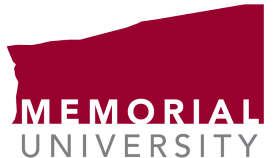

**Libraries**: Pandas and numpy for regular data analysis procedures. importing definitions ipynb file to retrieve definitions created. 

In [1]:
import pandas as pd
import numpy as np
import import_ipynb
import definitions as ds

importing Jupyter notebook from definitions.ipynb


**Load Events Dataset created in WyScout Dataset - Exploration jup NB**

In [2]:
Events_df=pd.read_excel("Event EPL Dataset-1718.xlsx")

Before starting to divide the dataset in detail levels, using the comparison between Venue and Local stadium we can assign when a team is playing at home or not (1,0)

In [3]:
##General Wrangling

#Create a column to differentiate between local and visitor teams
Events_df['Home_Away']=np.where(Events_df['venue']==Events_df['local_stadium'],1,0)

**Features selected for analysis**: The scope of this investigation will be centered on events (Such as Duels, Passes, Fouls), sub events (Simple pass, Air Duel, etc)  and their description (Accurate or Not Accurate). Further analysis will be implemented in following investigations. 

**LEVEL 1**:Just focussing on creating dataset focused on event frequency. Without sub event detail or description. As general as possible. For this process we are going to use the `Level_Creation()` that converts the dataframe by grouping features according to the details. It encapsulates another function: `preprocess_features()` which converts all categorical features into dummy variables. This makes it easier to take those dummy variables and sum them up.
> **Dataframe**: Data set of events needed to be converted.
<br>

*For more info visit the link:
<br>
https://github.com/fabriziolufe/GRI-Research---Passing-Networks/blob/main/definitions.ipynb*

In [6]:
Level1_df=Events_df[['matchId','teamId','eventName','id','Home_Away','winner']]

#creating the features concatenating the needed columns
Level1_df['Feature']=Level1_df['eventName'].copy()
Level1_df=Level1_df.drop(['eventName'],axis=1)
Level1_df=Level1_df.drop_duplicates('id')

#Arranging - pre processing features and grouping by the selected dataframe to create results. 
#For more info see 'definitions.ipynb'
Level1_df=ds.Level_Creation(Level1_df)


#Show results
Level1_df.head()

Outcome  Home_Away  Feature_Duel  Feature_Foul  \
matchId teamId                                                   
2499719 1609          1          1         256.0           9.0   
        1631         -1          0         256.0          12.0   
2499720 1625          1          0         176.0           9.0   
        1651         -1          1         176.0           6.0   
2499721 1610         -1          1         214.0          18.0   

                Feature_Free Kick  Feature_Goalkeeper leaving line  \
matchId teamId                                                       
2499719 1609                 51.0                              2.0   
        1631                 62.0                              0.0   
2499720 1625                 43.0                              2.0   
        1651                 42.0                              0.0   
2499721 1610                 37.0                              0.0   

                Feature_Interruption  Feature_Offside  \
matchId teamId                                          
2499719 1609                     0.0              6.0   
        1631                    84.0              2.0   
2499720 1625                     0.0              1.0   
        1651                    63.0              6.0   
2499721 1610                     2.0              2.0   

                Feature_Others on the ball  Feature_Pass  \
matchId teamId                                             
2499719 1609                          71.0         606.0   
        1631                          73.0         230.0   
2499720 1625                          54.0         754.0   
        1651                          65.0         184.0   
2499721 1610                          68.0         516.0   

                Feature_Save attempt  Feature_Shot  
matchId teamId                                      
2499719 1609                     4.0          27.0  
        1631                    10.0           7.0  
2499720 1625                     2.0          12.0  
        1651                     5.0           6.0  
2499721 1610                     5.0          15.0

**LEVEL 2**:Now including the sub events name into the features. Same procedure as first level with more detail. 

In [5]:
Level2_df=Events_df[['matchId','teamId','eventName','subEventName','id','Home_Away','winner']]

#creating the features concatenating the needed columns
Level2_df['Feature']=Level2_df['eventName']+'_'+Level2_df['subEventName']
Level2_df=Level2_df.drop(['eventName','subEventName'],axis=1)
Level2_df=Level2_df.drop_duplicates('id')

#Arranging - pre processing features and grouping by the selected dataframe to create results. 
#For more info see 'definitions.ipynb'
Level2_df=ds.Level_Creation(Level2_df)


#Show results
Level2_df.head()

Outcome  Home_Away  Feature_Duel_Air duel  \
matchId teamId                                              
2499719 1609          1          1                   58.0   
        1631         -1          0                   58.0   
2499720 1625          1          0                   41.0   
        1651         -1          1                   41.0   
2499721 1610         -1          1                   59.0   

                Feature_Duel_Ground attacking duel  \
matchId teamId                                       
2499719 1609                                  82.0   
        1631                                  65.0   
2499720 1625                                  61.0   
        1651                                  44.0   
2499721 1610                                  70.0   

                Feature_Duel_Ground defending duel  \
matchId teamId                                       
2499719 1609                                  65.0   
        1631                                  82.0   
2499720 1625                                  44.0   
        1651                                  61.0   
2499721 1610                                  49.0   

                Feature_Duel_Ground loose ball duel  Feature_Foul_Foul  \
matchId teamId                                                           
2499719 1609                                   51.0                9.0   
        1631                                   51.0               12.0   
2499720 1625                                   30.0                8.0   
        1651                                   30.0                6.0   
2499721 1610                                   36.0               13.0   

                Feature_Foul_Hand foul  Feature_Foul_Late card foul  \
matchId teamId                                                        
2499719 1609                       0.0                          0.0   
        1631                       0.0                          0.0   
2499720 1625                       1.0                          0.0   
        1651                       0.0                          0.0   
2499721 1610                       1.0                          0.0   

                Feature_Foul_Out of game foul  ...  Feature_Pass_Cross  \
matchId teamId                                 ...                       
2499719 1609                              0.0  ...                20.0   
        1631                              0.0  ...                18.0   
2499720 1625                              0.0  ...                22.0   
        1651                              0.0  ...                 3.0   
2499721 1610                              0.0  ...                27.0   

                Feature_Pass_Hand pass  Feature_Pass_Head pass  \
matchId teamId                                                   
2499719 1609                       2.0                    32.0   
        1631                       1.0                    32.0   
2499720 1625                       7.0                    22.0   
        1651                       3.0                    16.0   
2499721 1610                       4.0                    23.0   

                Feature_Pass_High pass  Feature_Pass_Launch  \
matchId teamId                                                
2499719 1609                      35.0                  4.0   
        1631                      27.0                 12.0   
2499720 1625                      30.0                  3.0   
        1651                      26.0                 13.0   
2499721 1610                      36.0                 15.0   

                Feature_Pass_Simple pass  Feature_Pass_Smart pass  \
matchId teamId                                                      
2499719 1609                       507.0                      6.0   
        1631                       129.0                     11.0   
2499720 1625                       651.0                     19.0   
        1651                       119.0    

**LEVEL 3**: Adding the description, now having the dataset with specific actions. ( could tend to overfit any possible further modelling) 

In [7]:
Level3_df=Events_df[['matchId','teamId','eventName','subEventName','Description','id','Home_Away','winner']]

#creating the features concatenating the needed columns
Level3_df['Feature']=Level3_df['eventName']+"_"+Level3_df['subEventName']+"_"+Level3_df['Description']
Level3_df=Level3_df.drop(['eventName','subEventName','Description'],axis=1)

#Arranging - pre processing features and grouping by the selected dataframe to create results. 
#For more info see 'definitions.ipynb'
Level3_df=ds.Level_Creation(Level3_df)


#Show results
Level3_df.head()

Outcome  Home_Away  Feature_Duel_Air duel_Accurate  \
matchId teamId                                                       
2499719 1609          1          1                            32.0   
        1631         -1          0                            38.0   
2499720 1625          1          0                            28.0   
        1651         -1          1                            18.0   
2499721 1610         -1          1                            27.0   

                Feature_Duel_Air duel_Assist  \
matchId teamId                                 
2499719 1609                             0.0   
        1631                             0.0   
2499720 1625                             0.0   
        1651                             0.0   
2499721 1610                             0.0   

                Feature_Duel_Air duel_Counter attack  \
matchId teamId                                         
2499719 1609                                     0.0   
        1631                                     1.0   
2499720 1625                                     0.0   
        1651                                     0.0   
2499721 1610                                     0.0   

                Feature_Duel_Air duel_Key pass  Feature_Duel_Air duel_Lost  \
matchId teamId                                                               
2499719 1609                               1.0                        26.0   
        1631                               0.0                        20.0   
2499720 1625                               0.0                        13.0   
        1651                               0.0                        23.0   
2499721 1610                               0.0                        32.0   

                Feature_Duel_Air duel_Neutral  \
matchId teamId                                  
2499719 1609                             12.0   
        1631                             12.0   
2499720 1625                              5.0   
        1651                              5.0   
2499721 1610                              2.0   

                Feature_Duel_Air duel_Not accurate  Feature_Duel_Air duel_Won  \
matchId teamId                                                                  
2499719 1609                                  26.0                       20.0   
        1631                                  20.0                       26.0   
2499720 1625                                  13.0                       23.0   
        1651                                  23.0                       13.0   
2499721 1610                                  32.0                       25.0   

                ...  Feature_Shot_Shot_Position: Out low left  \
matchId teamId  ...                                             
2499719 1609    ...                                       2.0   
        1631    ...                                       0.0   
2499720 1625    ...                                       0.0   
        1651    ...                                       1.0   
2499721 1610    ...                                       1.0   

                Feature_Shot_Shot_Position: Out low right  \
matchId teamId                                              
2499719 1609                                          1.0   
        1631                                          1.0   
2499720 1625                                          1.0   
        1651                                          1.0   
2499721 1610                                          0.0   

                Feature_Shot_Shot_Position: Post center left  \
matchId teamId                                                 
2499719 1609                                             0.0   
        1631                                             0.0   
2499720 1625                                             0.0   
        1651                                             0.0   
2499721 1610                                             0.0   

   

**Saving resulting levels in 3 different xlsx files!**

In [ ]:
#saving files from the 3 levels.
Level1_df.to_excel("Level1.xlsx") 
Level2_df.to_excel("Level2.xlsx") 
Level3_df.to_excel("Level3.xlsx") 

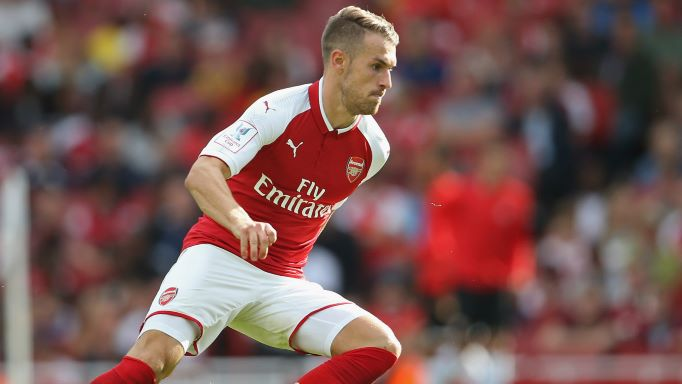

**Link to Original Dataset documentation**:
    https://figshare.com/collections/Soccer_match_event_dataset/4415000/5

**Published article from where Dataset was retrieved**:
Pappalardo, L., Cintia, P., Rossi, A., Massucco, E., Ferragina, P., Pedreschi, D., &amp; Giannotti, F. (2019). A public data  set of spatio-temporal match events in soccer competitions. Scientific Data, 6(1). https://doi.org/10.1038/s41597-019-0247-7 